### Real World application 1 (Chapitre 3)

In [23]:
# 1) Create an index, explain your choice of key.

import pymongo

# Se connecter à la base de données MongoDB
client = pymongo.MongoClient('localhost', 27017)
mydb = client["pubmed_cleaned"]
collection = mydb["pubmed_collection"]

# Créer un index sur la clé 'date'
collection.create_index("date")

# Confirmer la création de l'index
index_info = collection.index_information()
print(index_info)

{'_id_': {'v': 2, 'key': [('_id', 1)]}, 'date_1': {'v': 2, 'key': [('date', 1)]}}


In [28]:
# 2) Delete every paper that was published prior 2019

# Supprimer tous les articles publiés avant 2019
result = collection.delete_many({"date": {"$lt": "year 2019"}})

# Afficher le nombre d'articles supprimés
print(f"{result.deleted_count} articles ont été supprimés.")

5 articles ont été supprimés.


In [29]:
# 3) How many paper have a single author ? Two authors ?

# Compter le nombre de documents avec un seul auteur
single_author_count = collection.count_documents({"team_size": 1})

# Compter le nombre de documents avec deux auteurs
two_authors_count = collection.count_documents({"team_size": 2})

print(f"Nombre d'articles avec un seul auteur : {single_author_count}")
print(f"Nombre d'articles avec deux auteurs : {two_authors_count}")


Nombre d'articles avec un seul auteur : 5250
Nombre d'articles avec deux auteurs : 10124


In [30]:
# 4) What's the last paper inserted in the db ?

# Trier les documents par date d'insertion en ordre décroissant
latest_paper = collection.find_one(sort=[("_id", pymongo.DESCENDING)])

print("Dernier document inséré :")
print(latest_paper)

Dernier document inséré :
{'_id': ObjectId('60c753bac4b7559e040fe2b3'), 'pmid': 31226374, 'title': 'Identification of a novel UDP-glycosyltransferase gene from Rhodiola rosea and its expression during biotransformation of upstream precursors in callus culture.', 'ISSN': '1879-0003', 'abstract': ' "Roseroot (Rhodiola rosea L.) is a medicinal plant with adaptogenic properties and several pharmaceutically important metabolites. In this study, a full length cDNA encoding a UDPG gene of roseroot was identified, cloned and characterized. Its ORF (1425bp) was transferred into E. coli, where the expression of the recombinant enzyme was confirmed. To monitor the enzyme activity, 3 precursors (tyramine, 4-hydroxyphenylpyruvate & tyrosol) of salidroside biosynthesis pathway were added to roseroot callus cultures and samples were harvested after 1, 6, 12, 24, 48 & 96h. Along with the controls (without precursor feeding), each sample was subjected to HPLC and qRT-PCR for phytochemical and relative 

In [36]:
# 5) Find articles with null meshwords.

# Rechercher les articles avec des mots-clés Mesh nuls
articles_with_null_meshwords = collection.find({"meshwords": None}).limit(10)

# Afficher les résultats
for article in articles_with_null_meshwords:
    print(article)


{'_id': ObjectId('60c73446c4b7559e0406ca15'), 'pmid': 30618194, 'title': 'Liberating Native Mass Spectrometry from Dependence on Volatile Salt Buffers by Use of Gabor Transform.', 'ISSN': '1439-7641', 'abstract': ' "Volatile salts, such as ammonium acetate, are commonly used in buffers for the analysis of intact proteins and protein complexes in native electrospray ionization mass spectrometry. Although these solutions are not technically buffers near pH 7, the volatile nature of the salt minimizes ion adduction to proteins upon transfer to vacuum. Conversely, common biochemical salt buffers, such as Tris/NaCl, are not traditionally used in native mass spectrometry because of the tendency of sodium and other ions to adduct to proteins or form large cluster ions, severely frustrating accurate mass assignment. Here, we demonstrate a Gabor transform method for extracting signal from native-like protein ions even in the presence of a large salt-cluster background. We further show the utili

In [38]:
# 6) Choose a keyword you are interested in (machine learning, computer vision,...). Find the number of articles with the choosen keyword in their meshwords, abstract or title.

# Mot-clé d'intérêt
mot_cle = "machine learning"

# Compter les articles contenant le mot-clé dans meshwords, le résumé ou le titre
nb_articles_mot_cle = collection.count_documents({
    "$or": [
        {"meshwords": {"$regex": mot_cle, "$options": "i"}},  # Recherche regex insensible à la casse dans meshwords
        {"abstract": {"$regex": mot_cle, "$options": "i"}},  # Recherche regex insensible à la casse dans le résumé
        {"title": {"$regex": mot_cle, "$options": "i"}}       # Recherche regex insensible à la casse dans le titre
    ]
})

print("Nombre d'articles contenant le mot-clé '{}' dans meshwords, le résumé ou le titre : {}".format(mot_cle, nb_articles_mot_cle))

Nombre d'articles contenant le mot-clé 'machine learning' dans meshwords, le résumé ou le titre : 521


In [39]:
# Mots-clés d'intérêt
mots_cles = ["machine learning", "computer vision"]

# Initialiser le compteur total
total_articles = 0

# Parcourir les mots-clés et compter les articles pour chaque mot-clé
for mot_cle in mots_cles:
    # Compter les articles contenant le mot-clé dans meshwords, le résumé ou le titre
    nb_articles_mot_cle = collection.count_documents({
        "$or": [
            {"meshwords": {"$regex": mot_cle, "$options": "i"}},  # Recherche regex insensible à la casse dans meshwords
            {"abstract": {"$regex": mot_cle, "$options": "i"}},  # Recherche regex insensible à la casse dans le résumé
            {"title": {"$regex": mot_cle, "$options": "i"}}       # Recherche regex insensible à la casse dans le titre
        ]
    })
    # Ajouter le nombre d'articles pour ce mot-clé au total
    total_articles += nb_articles_mot_cle
    print("Nombre d'articles contenant le mot-clé '{}' dans meshwords, le résumé ou le titre : {}".format(mot_cle, nb_articles_mot_cle))

print("Nombre total d'articles contenant les mots-clés {} dans meshwords, le résumé ou le titre : {}".format(mots_cles, total_articles))

Nombre d'articles contenant le mot-clé 'machine learning' dans meshwords, le résumé ou le titre : 521
Nombre d'articles contenant le mot-clé 'computer vision' dans meshwords, le résumé ou le titre : 38
Nombre total d'articles contenant les mots-clés ['machine learning', 'computer vision'] dans meshwords, le résumé ou le titre : 559


In [51]:
# 7) What's the number of articles that have atleast one affiliation AND meshwords.

# Compter le nombre d'articles avec au moins une affiliation et des meshwords
count_articles = collection.count_documents({"$and": [{"authors": {"$regex": "affil"}}, {"meshwords": {"$exists": True, "$ne": []}}]})

print("Nombre d'articles avec au moins une affiliation et des meshwords :", count_articles)

Nombre d'articles avec au moins une affiliation et des meshwords : 99413


In [42]:
# 8) How many articles have a publishing date after 2020 ?

# Compter le nombre d'articles avec une date de publication après 2020
count_articles = collection.count_documents({"date": {"$gt": "year 2020"}})

print("Nombre d'articles publiés après 2020 :", count_articles)

Nombre d'articles publiés après 2020 : 0


In [5]:
# 9) Find articles where there's atleast one affiliation from a choosen country (you decide which one).

# Pays choisi
chosen_country = "France"  # Par exemple, la France

# Recherche des 10 premiers articles avec au moins une affiliation de la France dans les auteurs
articles_with_chosen_country_affiliation = collection.find({"authors": {"$regex": chosen_country}}).limit(10)

# Afficher les résultats
for article in articles_with_chosen_country_affiliation:
    print(article)


{'_id': ObjectId('60c73422c4b7559e0406c027'), 'pmid': 30615595, 'title': 'Oxidative stress in thyroid carcinomas: biological and clinical significance.', 'ISSN': '1479-6821', 'abstract': ' "At physiological concentrations, reactive oxygen species (ROS), including superoxide anions and H2O2, are considered as second messengers that play key roles in cellular functions, such as proliferation, gene expression, host defence and hormone synthesis. However, when they are at supraphysiological levels, ROS are considered potent DNA-damaging agents. Their increase induces oxidative stress, which can initiate and maintain genomic instability. The thyroid gland represents a good model for studying the impact of oxidative stress on genomic instability. Indeed, one particularity of this organ is that follicular thyroid cells synthesise thyroid hormones through a complex mechanism that requires H2O2. Because of their detection in thyroid adenomas and in early cell transformation, both oxidative stre

In [68]:
# 10) Check for any duplicates. (hint: look at the doi or the pmid)

# Aggregate to find duplicates based on DOI
doi_duplicates = list(collection.aggregate([
    {"$group": {"_id": "$doi", "count": {"$sum": 1}}},
    {"$match": {"count": {"$gt": 1}}}
]))

# Aggregate to find duplicates based on PMID
pmid_duplicates = list(collection.aggregate([
    {"$group": {"_id": "$pmid", "count": {"$sum": 1}}},
    {"$match": {"count": {"$gt": 1}}}
]))

# Print the duplicates based on DOI
print("Duplicates based on DOI:")
for duplicate in doi_duplicates:
    print(duplicate)

# Print the duplicates based on PMID
print("\nDuplicates based on PMID:")
for duplicate in pmid_duplicates:
    print(duplicate)

Duplicates based on DOI:
{'_id': '10.1093/jas/skz192', 'count': 2}
{'_id': ', affil str ', 'count': 40}
{'_id': ' }, { name ml ', 'count': 55}
{'_id': '10.1093/jnci/djz062', 'count': 2}
{'_id': ' } } }, from journal { title { iso-jta ', 'count': 10}
{'_id': '10.1093/cid/ciz518', 'count': 2}
{'_id': '', 'count': 5}
{'_id': ' }, authors { names std { { name ml ', 'count': 73}
{'_id': '10.23876/j.krcp.19.006', 'count': 2}

Duplicates based on PMID:


In [65]:
# 11) Remove every articles where the abstract starts with an "R".

# Find documents where the abstract starts with an "R"
cursor = collection.find({"abstract": {"$regex": r"^\s*T"}})

# Iterate over the cursor and delete each document
deleted_count = 0
for document in cursor:
    result = collection.delete_one({"_id": document["_id"]})
    deleted_count += 1

# Print the number of deleted articles
print(f"{deleted_count} articles have been removed.")


0 articles have been removed.


In [6]:
# 12) Return the list of papers (pmid) where there's atleast one affiliation per author

# Initialiser une liste pour stocker les identifiants PubMed (pmid) des documents
papers_with_affiliations = []

# Parcourir les 10 premiers documents dans la collection
for document in collection.find().limit(10):
    authors = document.get("authors", [])
    affiliations_exist = True
    
    # Vérifier s'il y a au moins une affiliation pour chaque auteur
    for author in authors:
        if "name" in author and "affil" not in author:
            affiliations_exist = False
            break
    
    # Si au moins une affiliation existe pour chaque auteur, ajouter le pmid à la liste
    if affiliations_exist:
        papers_with_affiliations.append(document["pmid"])

# Imprimer la liste des identifiants PubMed des documents qui satisfont à la condition
print("List of papers with at least one affiliation per author:")
print(papers_with_affiliations)

List of papers with at least one affiliation per author:
[30608900, 30614081, 30614166, 30614610, 30614629, 30615595, 30615597, 30615818, 30615980, 30618194]


In [ ]:
# 12) Return the list of papers (pmid) where there's atleast one affiliation per author

# Initialiser une liste pour stocker les identifiants PubMed (pmid) des documents
#papers_with_affiliations = []

# Parcourir chaque document dans la collection
#for document in collection.find():
#    authors = document.get("authors", [])
#    affiliations_exist = True
    
    # Vérifier s'il y a au moins une affiliation pour chaque auteur
#    for author in authors:
#        if "name" in author and "affil" not in author:
#            affiliations_exist = False
#            break
    
    # Si au moins une affiliation existe pour chaque auteur, ajouter le pmid à la liste
#    if affiliations_exist:
#        papers_with_affiliations.append(document["pmid"])

# Imprimer la liste des identifiants PubMed des documents qui satisfont à la condition
#print("List of papers with at least one affiliation per author:")
#print(papers_with_affiliations)

In [76]:
# 13) Create 500 random samples of the dataset, compute a statistics that you are interested in and check how it behaves through the different samples

import pymongo
import random
import numpy as np

# Define the statistic of interest function
def compute_statistic(data):
    # Example: Compute the mean of a specific field (e.g., 'team_size')
    return np.mean([doc.get('team_size', 0) for doc in data])

# Number of random samples
num_samples = 500

# List to store computed statistics for each sample
sample_statistics = []

# Randomly sample the dataset 500 times and compute the statistic for each sample
for _ in range(num_samples):
    # Randomly sample from the collection
    sample_size = 100  # Adjust sample size as needed
    random_sample = random.sample(list(collection.find()), sample_size)
    
    # Compute the desired statistic for the random sample
    statistic = compute_statistic(random_sample)
    
    # Append the computed statistic to the list
    sample_statistics.append(statistic)

# Analyze the distribution or behavior of the computed statistic across the samples
# For example, you can calculate mean, median, standard deviation, or plot a histogram
mean_statistic = np.mean(sample_statistics)
median_statistic = np.median(sample_statistics)
std_dev_statistic = np.std(sample_statistics)

# Print the summary statistics
print("Summary Statistics:")
print("Mean:", mean_statistic)
print("Median:", median_statistic)
print("Standard Deviation:", std_dev_statistic)

Summary Statistics:
Mean: 6.2285
Median: 6.04
Standard Deviation: 1.6363055796519181


## 14) Sandbox exercise: think of a problematic and try to answer it.

Problème : Quelle est la corrélation entre la taille de l'équipe d'auteurs et le nombre de pays impliqués dans la recherche ?

       pmid  team_size  nb_country
0  30608900          4           1
1  30614081          2           0
2  30614166          3           0
3  30614610          2           1
4  30614629          2           2


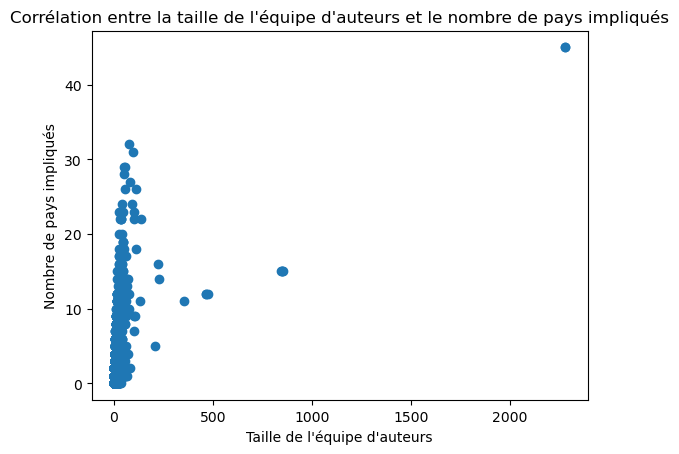

In [4]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

# Connexion à la base de données MongoDB
client = pymongo.MongoClient('localhost', 27017)
mydb = client["pubmed_cleaned"]
collection = mydb["pubmed_collection"]

# Extraire les données pertinentes
data = collection.find({}, {"_id": 0, "pmid": 1, "team_size": 1, "nb_country": 1})
df = pd.DataFrame(data)

# Afficher un aperçu des données
print(df.head())

# Analyser la corrélation entre la taille de l'équipe d'auteurs et le nombre de pays impliqués
plt.scatter(df['team_size'], df['nb_country'])
plt.xlabel('Taille de l\'équipe d\'auteurs')
plt.ylabel('Nombre de pays impliqués')
plt.title('Corrélation entre la taille de l\'équipe d\'auteurs et le nombre de pays impliqués')
plt.show()